In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc
from sklearn.metrics import *
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from MultiColumnLabelEncoder import MultiColumnLabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# CEL
Ten zbiór danych jest zbiorem podstawowych danych sygnałów biologicznych dotyczących zdrowia. <br>
Celem jest określenie obecności lub braku palenia poprzez sygnały biologiczne. <br>

Według Światowej Organizacji Zdrowia palenie jest pojedynczą, najbardziej możliwą do zapobieżenia przyczyną wczesnej śmierci [1]. Palenie papierosów powoduje około dwudziestu procent wszystkich zgonów w Stanach Zjednoczonych każdego roku, a także zwiększa szanse na wystąpienie wielu poważnych chorób. Choroby związane z paleniem w Stanach Zjednoczonych kosztują 300 miliardów dolarów każdego roku, wliczając w to bezpośrednią opiekę medyczną i utraconą produktywność z powodu chorób generowanych przez palenie [2,3]. Ogromne konsekwencje dla zdrowia publicznego wynikające z palenia papierosów ilustrują potrzebę leczenia pomagającego ludziom rzucić palenie.

Wstępnym krokiem w wielu programach rzucania palenia jest charakterystyka wzorów palenia w czasie. Chociaż dominującą metodą oceny wzorców palenia jest raport własny [4], zbadano wiele różnych technologii pozwalających na monitorowanie czynności związanych z paleniem w życiu codziennym [5-7]. Obecnie technologie noszone, takie jak czujniki oddechu, czujniki zbliżeniowe, inteligentne zapalniczki i czujniki inercyjne (IMU) są atrakcyjne, ponieważ zapewniają praktyczny i wydajny sposób śledzenia palenia. Zapalniczki z oprzyrządowaniem mogą przechwytywać i rejestrować zdarzenia naciśnięcia i zwolnienia zapalniczki jako miary konsumpcji papierosów [8,9], jednak na podstawie tych informacji nie można ustalić szczegółów dotyczących czasu trwania palenia. Jednostki IMU są szeroko stosowane w systemach noszonych do oceny ruchu ręki/ramienia. Ich niewielkie rozmiary i przystępna cena czynią je prostymi i skutecznymi narzędziami do rejestracji wzorca ruchu ręki/ramienia. Badania oparte na IMU koncentrowały się głównie na gestach ręka-usta (HMG) w trakcie palenia. Głównym wyzwaniem metod opartych na gestach ręka-usta jest odróżnienie gestów związanych z paleniem od innych codziennych czynności. Opisano kilka różnych podejść i algorytmów do rozpoznawania gestów palenia i zdarzeń związanych z paleniem.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6400470/

## Wstępna analiza

In [25]:
data = pd.read_csv("../data/smoking.csv")
data.drop(["ID", "oral"], axis=1, inplace=True)
data.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [27]:
data.shape

(55692, 25)

In [28]:
data.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


<AxesSubplot:>

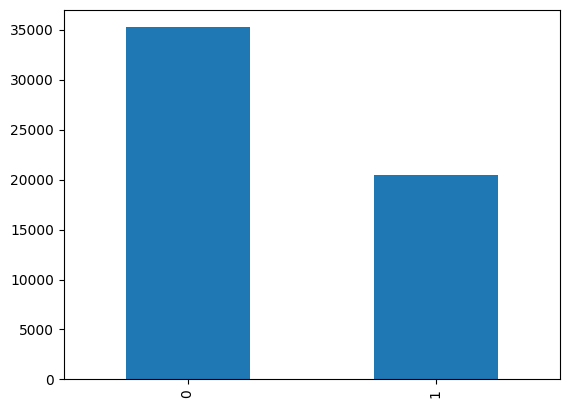

In [29]:
data["smoking"].value_counts().plot(kind="bar")

?rozważ oversampling

## Przygotowanie danych

In [30]:
oe = OrdinalEncoder()
data[data.select_dtypes(include='object').columns.tolist()] = oe.fit_transform(data[data.select_dtypes(include='object').columns.tolist()]) 
oe.categories_

[array(['F', 'M'], dtype=object), array(['N', 'Y'], dtype=object)]

In [31]:
y = data["smoking"].copy()
X = data.drop("smoking", axis=1).copy()



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [32]:
def plot_roc_auc(clf, y_test):
    probas = clf.predict_proba(X_test_lr)
    fpr, tpr, _ = roc_curve(y_test, probas[:,1])
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

def plot_confusion_matrix(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    cm_lr = confusion_matrix(y_test, y_pred)
    cm_display_lr = ConfusionMatrixDisplay(cm_lr).plot()

def generate_raport(clf, X_train, X_test, y_train, y_test, get_frame=False) -> None:
        """
        Function to compute selected metric of the model and
        Needs better documentation
        """

        model = clf.fit(X_train, y_train)
        predictions = model.predict(X_test)
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        accuracy = accuracy_score(y_test, predictions)
        roc_auc = roc_auc_score(y_test, predictions)
        
        if get_frame:
            tmp = {
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Accuracy": accuracy,
            "Roc_auc_score": roc_auc}
            return pd.DataFrame.from_dict(tmp, orient = 'index').T
        
        print('Model test:')
        print(f'\t\tPrec: {precision} \
                \n\t\t Rec: {recall} \
                \n\t\t F1: {f1} \
                \n\t\t Acc: {accuracy} \
                \n\t\t ROC_AUC: {roc_auc}')
        

## Regresja logistyczna

Zmienne wybrane do modelu(najbardziej skorelowane z płeć): płeć, hemoglobin, serum_creatine, gtp, triglyceryde

In [34]:
X_train_lr = X_train[["gender", "hemoglobin", "serum creatinine", "Gtp", "triglyceride"]].copy()
X_test_lr = X_test[["gender", "hemoglobin", "serum creatinine", "Gtp", "triglyceride"]].copy()
y_train_lr = y_train.copy()
y_test_lr = y_test.copy()

### Przygotowanie danych

<AxesSubplot:>

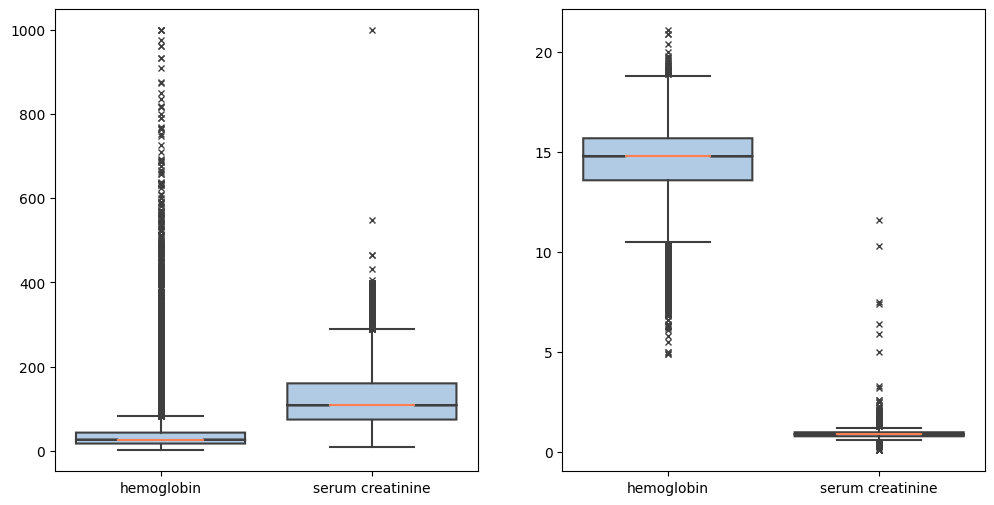

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True,
                                    figsize=(12, 6))

sns.boxplot(data=X_train_lr[["Gtp", "triglyceride"]],
                orient='v',
                ax=axes[0],
                flierprops={"marker": "x"},
                notch=True,
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
                labels=["Gtp"]
                )
sns.boxplot(data=X_train_lr[["hemoglobin", "serum creatinine"]],
                orient='v',
                ax=axes[1],
                flierprops={"marker": "x"},
                notch=True,
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},)


### LR basic

Over-fitting often tends to occur when the fitted model has many feature variables with relatively
large weights in magnitude. To prevent this situation we can use weight decay method (or ridge
regression). Let J(θ) = P
k
θ
2
k
(or `2). The result of using such a function J(θ) is classifier with
smaller values of weights and often better generalization ability. We can also prune this classifier:
weights with magnitudes smaller than some certain threshold can be considered redundant and removed. This regularization technique is very easy to implement and often works pretty well. It
is still very often used for different applications: in [8] for detecting genes interaction, in [6] for
classification of microarray data, in [1] for gene expression analysis.

In [48]:
lr = LogisticRegression(penalty="none")
lr.fit(X_train_lr, y_train_lr)

LogisticRegression(penalty='none')

In [49]:
pd.Series(dict(zip(X_train_lr.columns.tolist(), *lr.coef_.tolist())), name="Współczynniki")

gender              3.111328
hemoglobin          0.119628
serum creatinine   -0.921873
Gtp                 0.005597
triglyceride        0.003820
Name: Współczynniki, dtype: float64

In [53]:
logit_model = sm.Logit(y_train_lr, X_train_lr).fit()
# logit_model = sm.Logit(y_train, sm.add_constant(X_train_lr)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.490716
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                smoking   No. Observations:                44553
Model:                          Logit   Df Residuals:                    44548
Method:                           MLE   Df Model:                            4
Date:                Sun, 20 Nov 2022   Pseudo R-squ.:                  0.2534
Time:                        11:56:07   Log-Likelihood:                -21863.
converged:                       True   LL-Null:                       -29282.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
gender               3.6815      0.044     83.123      0.000       3.595       3.768
hemoglobin 

In [ ]:
generate_raport(LogisticRegression(), X_train_lr, X_test_lr, y_train_lr, y_test_lr, True)

,Precision,Recall,F1 Score,Accuracy,Roc_auc_score
0,0.618804,0.677043,0.646615,0.726816,0.716492


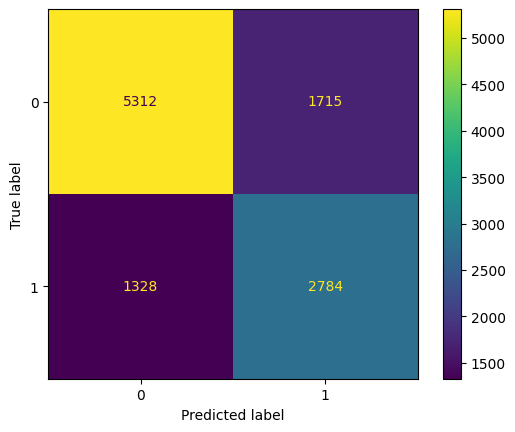

In [ ]:
plot_confusion_matrix(lr, X_test_lr, y_test_lr)

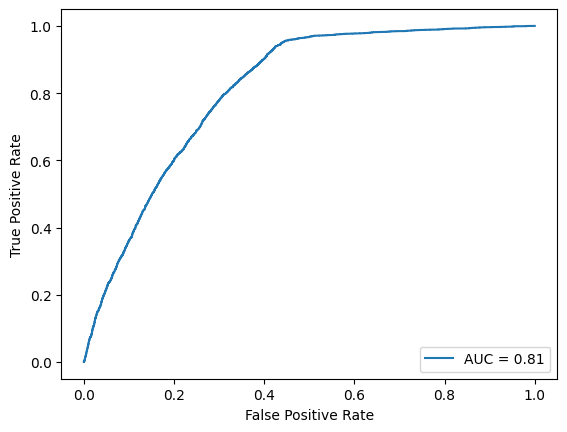

In [ ]:
plot_roc_auc(lr, y_test)

### ANOTHER APPROACH

In [ ]:
numerical_columns_selector = selector(dtype_exclude=object)

numerical_columns = numerical_columns_selector(X_train)
numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer([
    ('standard_scaler', numerical_preprocessor, numerical_columns)
    ])

In [ ]:
scaled_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
scaled_lr

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['gender', 'age',
                                                   'height(cm)', 'weight(kg)',
                                                   'waist(cm)',
                                                   'eyesight(left)',
                                                   'eyesight(right)',
                                                   'hearing(left)',
                                                   'hearing(right)', 'systolic',
                                                   'relaxation',
                                                   'fasting blood sugar',
                                                   'Cholesterol',
                                                   'triglyceride', 'HDL', 'LDL',
                                                   'hemoglobin',
                                                   'Urine protein',
                                                   'serum creatinine', 'AST',
                                                   'ALT', 'Gtp',
                                                   'dental caries',
                                                   'tartar'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [ ]:
print(generate_raport(scaled_lr, X_train, X_test, y_train, y_test, True))
# plot_confusion_matrix(scaled_lr, X_test, y_test)
# plot_roc_auc(scaled_lr, y_test)

   Precision    Recall  F1 Score  Accuracy  Roc_auc_score
0   0.637753  0.690175  0.662929   0.74091       0.730387


In [ ]:
# TODO: Logarytm szans (logit) i zmienne objaśniające (X) powinny być zależne liniowo